# K Means Clustering

K-Means is an unsupervised learning technique for clustering unlabelled data. Typical use cases:
- Cluster similar objects: documents, customers
- Market segmentation
- Similar physical groups

Algorithm:
- Choose number of clusters k
- Randomly assign each data point (sample) to a cluster
- Until clusters stop changing, repeat:
    - For each cluster, compute centroid (mean) with all data points
    - Assign each data point the cluster for which the centroid is closest

Which k should we use? Difficult to answer without domain expertise. However, often the **elbow method** is used:
- We run the clustering for several k values
- For each k value, we compute the Sum of Squared Errors (SSE): the sum of squared distances from each point to its cluster centroid
- SSE decreases as k increases, as clusters get smaller
- We select the k which is in the "elbow" of the diagram k vs SSE, i.e., where the abrupt decrease is broken; the intuition is we won't gain more information (less error) with more groups (higher k values)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# We load the blob-maker from sklearn
# It allows as to create artifical data with some parameters
from sklearn.datasets import make_blobs

In [13]:
# We create our synthetic data
# It will be a tuple with 2 arrays:
# [0]: sample features
# [1]: sample targets/labels
data = make_blobs(n_samples=200,
                  n_features=2,
                  centers=4,
                  cluster_std=1.8,
                  random_state=101)

In [14]:
# Sample features: 200 x 2
data[0].shape

(200, 2)

In [15]:
# Sample targets/labels: 200
data[1].shape

(200,)

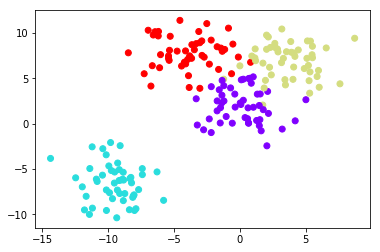

In [12]:
plt.scatter(x=data[0][:,0],y=data[0][:,1],c=data[1],cmap='rainbow')

In [16]:
# Load KMeans module
from sklearn.cluster import KMeans

In [49]:
# Instantiate KMeans with n_clusters=k
kmeans = KMeans(n_clusters=4)

In [50]:
# Fit data to KMeans
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [51]:
# Get cluster centers
kmeans.cluster_centers_

array([[-0.0123077 ,  2.13407664],
       [-9.46941837, -6.56081545],
       [-4.13591321,  7.95389851],
       [ 3.71749226,  7.01388735]])

In [52]:
# Get predicted labels
kmeans.labels_

array([2, 3, 0, 3, 3, 1, 3, 0, 3, 0, 2, 0, 3, 3, 2, 0, 3, 0, 1, 2, 1, 0, 0,
       1, 2, 1, 1, 0, 3, 3, 2, 1, 3, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 2, 0, 3,
       2, 0, 1, 0, 0, 2, 3, 0, 1, 2, 0, 0, 2, 3, 1, 3, 1, 2, 3, 0, 1, 3, 3,
       1, 3, 0, 1, 0, 1, 3, 3, 0, 2, 0, 0, 1, 3, 1, 0, 0, 0, 2, 0, 1, 1, 1,
       1, 0, 0, 1, 3, 2, 1, 3, 0, 1, 0, 0, 3, 0, 1, 3, 1, 1, 3, 2, 2, 3, 1,
       3, 2, 2, 3, 2, 0, 2, 0, 2, 0, 3, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 3, 2,
       3, 0, 1, 3, 1, 2, 2, 3, 0, 1, 2, 2, 2, 2, 0, 3, 0, 2, 3, 3, 3, 0, 3,
       0, 0, 2, 1, 2, 0, 3, 2, 0, 3, 0, 2, 3, 0, 2, 3, 3, 1, 3, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 0, 1, 3, 3, 2, 1, 0, 3, 3, 1, 0], dtype=int32)

In [53]:
# Usually, we cannot compare predictions and labels
# because K-means is unsupervised and we are not expected to know the labels
# However, in this case we know it and can plot a comparison with plt.scatter

Text(0.5,1,'K Means Prediction')

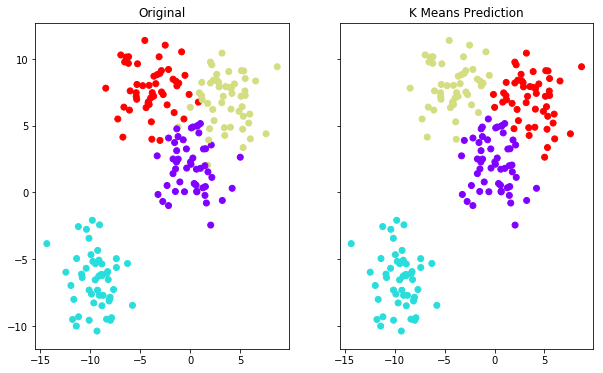

In [54]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(10,6))
ax1.scatter(x=data[0][:,0],y=data[0][:,1],c=data[1],cmap='rainbow')
ax1.set_title('Original')
ax2.scatter(x=data[0][:,0],y=data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title('K Means Prediction')

In [55]:
# Now, we can easily change the value of n_clusters
# re-run cells and plot the detected clusters!